# 12.2. Simulating an elementary cellular automaton

In [1]:
import numpy as np
import matplotlib
import random
import matplotlib.pyplot as plt
%matplotlib inline

#source https://github.com/ipython-books/cookbook-2nd-code

# Print some velocity averages

In [2]:
# N = 1000
# L = 1000
# its = 1000
# eta_range = [2.0, 0.2, 0.02, 0.002, 0.0002]

# for eta in eta_range:
#     p = (N/L)
#     x = generate2(L, its, eta, p)
#     avg_velocity = []

#     for gen in x:
#         velocities = []
#         for vel in gen:  # only count the non-zero velocities
#             if vel != 0:
#                 velocities.append(vel)
#         avg_velocity.append(sum(velocities)/len(velocities))
#     plt.plot(avg_velocity, label=eta)

# plt.legend()
# plt.show()

## Particle density plot

In [3]:
def U(x_row, pos):
    neighbours = []
     
    # two nearest neighbours total 
    if pos == 0:
        neighbours_pos = [1, -1, pos]
    elif pos == len(x_row)-1:
        neighbours_pos = [0, -2, pos]
    else:
        neighbours_pos = [pos-1, pos, pos+1]  
    
    maj_velocity = 0
    for n in neighbours_pos:
        pos_list = x_row[n]
        for idx in range(len(pos_list)):
            maj_velocity += x_row[n][idx] # getting the velocity of every bird that is locates at this position
    
    if maj_velocity > 0:
        velocity_avg = +1
    elif maj_velocity < 0:
        velocity_avg = -1
    else:
        velocity_avg = 0
    
    return velocity_avg

def flock_step(x_row, eta, size):
    new_row = [ [] for _ in range(size) ]

    for pos, birds in enumerate(x_row):
        for bird in (birds):
            #chosen particle
            x_mu = pos  # location of bird
            v_mu = bird   # velocity of bird

            U_x = U(x_row, pos)

            W_u = (1-(1-2*eta)*v_mu*U_x)/2
            if v_mu == 0:
                continue

            if (random.random() < W_u):
                # We flip direction of bird
                if v_mu == -1:
                    vel_to_insert = 1
                    pos_to_insert = x_mu + vel_to_insert

                    # make sure we keep bounds in mind, insert in the beginning
                    if pos_to_insert > (len(x_row)-1):
                        pos_to_insert = 0
                else: # v_mu is 1
                    vel_to_insert = -1
                    pos_to_insert = x_mu + vel_to_insert
                
                new_row[pos_to_insert].append(vel_to_insert)
                
            else:
                # We do not flip, keep original velocity. But we do move the bird
                vel_to_insert = v_mu
                if (pos == (len(x_row)-1)) & (v_mu == 1): # move from right bound to left bound
                    pos_to_insert = 0
                else:
                    pos_to_insert = x_mu + v_mu
                
                new_row[pos_to_insert].append(vel_to_insert)
    
    #print('new row', new_row.shape)
    return new_row


def generate2(size, steps, eta, p):
    #x = np.empty((steps, size), dtype=object)
    x = [ [ [] for _ in range(size) ] for _ in range(steps) ]
    
    velocities  = np.random.choice([-1, 0, 1], size=size, p=[p/2, 1-p, p/2])
    velocities = velocities.tolist()

    for idx, v in enumerate(velocities):
        x[0][idx] = [v]
    
    for i in range(steps - 1):
        x[i + 1] = flock_step(x[i], eta, size)
        
    return x

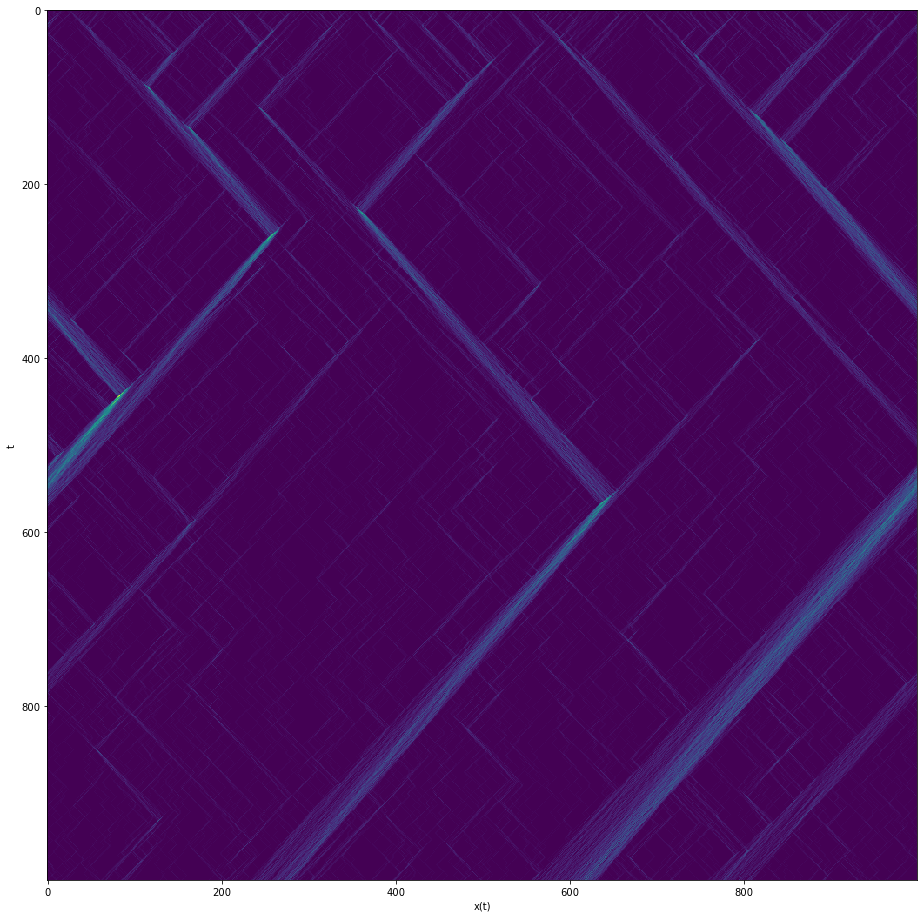

In [4]:
N = 1000
L = 1000
its = 1000
eta = 0.09
p = (N/L)
x = generate2(L, its, eta, p)


def get_density_values(x):
    list_of_density = []
    for gens in x:
        density_row = []
        for pos in gens:
            density_row.append(len(pos))
        list_of_density.append(density_row)
    return list_of_density


density_x = get_density_values(x)

plt.figure(figsize=(20, 16))
plt.ylabel('t')
plt.xlabel('x(t)')
plt.imshow(density_x, interpolation='none')

## Generate plot for U vs eta for different L sizes to obtain critical value of eta (n)

##### note that p cannot be > 1, so N is set equal to L

In [7]:
from scipy import stats

In [8]:
#N = 1000
#L = 1000
#p = (N/L)
#L_range = np.arange(1000, 5001, 1000)
L_range = [500, 1000, 1500, 2000]
its = 1000
eta_range = np.linspace(0.002, 0.5, 10)

end_average_velocity = []
U_list_per_L = []
V4_list_per_L = []
V2_list_per_L = []
U2_list_per_L = []
rounds = 0

for L in L_range:
    
    end_average_velocity = []
    V4_list = []
    V2_list = []
    U_list = []
    U2_list = []
    
    N = L
    p = N/L
    
    for eta in eta_range:
        x = generate2(L, its, eta, p)
        avg_velocity = []

        for gen in x:
            velocities = []

            for vel in gen:  # only count the non-zero velocities
                if vel == []:
                    continue
                if vel != 0:
                    for v in vel:
                        velocities.append(int(v))

            avg_velocity.append((abs(sum(velocities)))/len(velocities))
        end_average_velocity.append(np.mean(avg_velocity[-100:]))

        V4 = stats.kstat(avg_velocity, 4)
        V2 = stats.kstat(avg_velocity, 2)
        V2_list.append(V2)
        V4_list.append(V4)
        U_list.append(1 - (V4 / (3 * V2)))
        U2_list.append(1 - (V4 / V2))
        rounds += 1
        print("Percentage done:", (rounds/(len(eta_range)*len(L_range))*100), '%')
        
    V2_list_per_L.append(V2_list) 
    V4_list_per_L.append(V4_list)
    U_list_per_L.append(U_list)
    U2_list_per_L.append(U2_list)

Percentage done: 2.5 %
Percentage done: 5.0 %
Percentage done: 7.5 %
Percentage done: 10.0 %
Percentage done: 12.5 %
Percentage done: 15.0 %
Percentage done: 17.5 %
Percentage done: 20.0 %
Percentage done: 22.5 %
Percentage done: 25.0 %
Percentage done: 27.500000000000004 %
Percentage done: 30.0 %
Percentage done: 32.5 %
Percentage done: 35.0 %
Percentage done: 37.5 %
Percentage done: 40.0 %
Percentage done: 42.5 %
Percentage done: 45.0 %
Percentage done: 47.5 %
Percentage done: 50.0 %
Percentage done: 52.5 %
Percentage done: 55.00000000000001 %
Percentage done: 57.49999999999999 %
Percentage done: 60.0 %
Percentage done: 62.5 %
Percentage done: 65.0 %
Percentage done: 67.5 %
Percentage done: 70.0 %
Percentage done: 72.5 %
Percentage done: 75.0 %
Percentage done: 77.5 %
Percentage done: 80.0 %
Percentage done: 82.5 %
Percentage done: 85.0 %
Percentage done: 87.5 %
Percentage done: 90.0 %
Percentage done: 92.5 %
Percentage done: 95.0 %
Percentage done: 97.5 %
Percentage done: 100.0 %


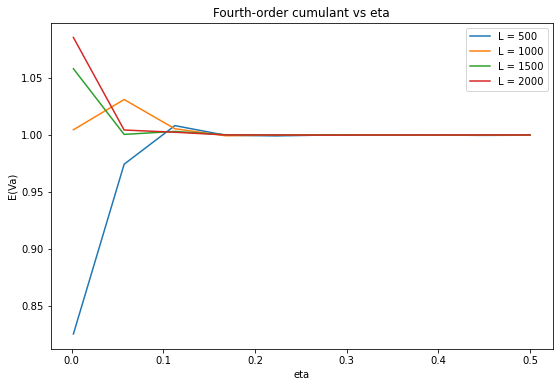

In [11]:
labels = ["L = 500", "L = 1000", "L = 1500", "L = 2000"]

for x in range(len(U_list_per_L)):
    plt.plot(eta_range, U_list_per_L[x], label = labels[x])

plt.legend(loc = 'upper right')
plt.xlabel("eta")
plt.ylabel("E(Va)")
plt.title("Fourth-order cumulant vs eta")
plt.rcParams["figure.figsize"] = (9,6)

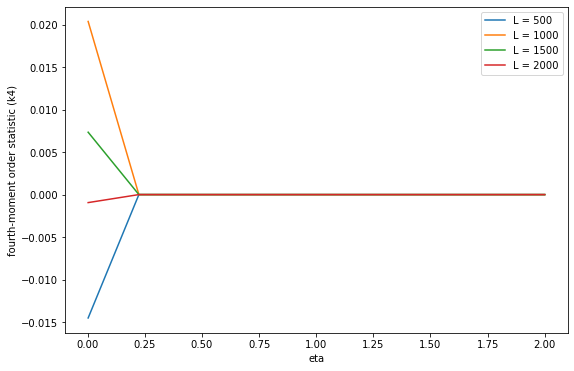

In [141]:
labels = ["L = 500", "L = 1000", "L = 1500", "L = 2000"]
    
for x in range(len(V4_list_per_L)):
    plt.plot(eta_range, V4_list_per_L[x], label = labels[x])

plt.legend(loc = 'upper right')
plt.xlabel("eta")
plt.ylabel("fourth-moment order statistic (k4)")
plt.rcParams["figure.figsize"] = (9,6)

Text(0, 0.5, 'second-moment order statistic (k2)')

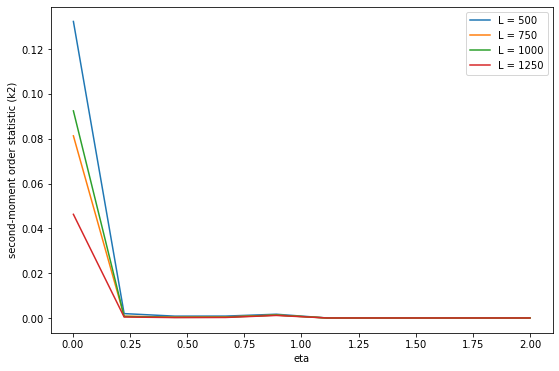

In [142]:
labels = ['L = 500', 'L = 750', 'L = 1000', 'L = 1250', 'L = 1500']
for x in range(len(V2_list_per_L)):
    plt.plot(eta_range, V2_list_per_L[x], label = labels[x])

plt.legend()
plt.xlabel("eta")
plt.ylabel("second-moment order statistic (k2)")

Text(0, 0.5, 'k4/ k2')

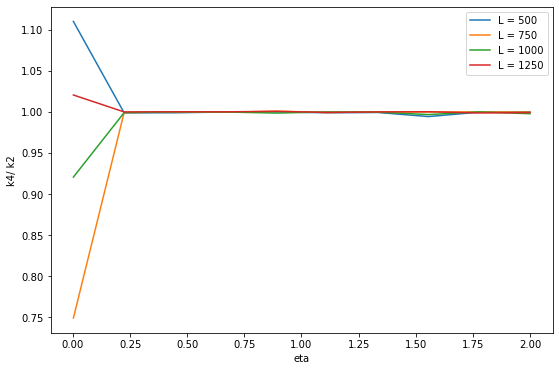

In [143]:
labels = ['L = 500', 'L = 750', 'L = 1000', 'L = 1250', 'L = 1500']
for x in range(len(U2_list_per_L)):
    plt.plot(eta_range, U2_list_per_L[x], label = labels[x])

plt.legend()
plt.xlabel("eta")
plt.ylabel("k4/ k2")